In [1]:

import pandas as pd
import numpy as np
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder 

In [2]:
Data = pd.read_csv('../0.data/loan_customer.csv',index_col='SK_ID_CURR')

In [3]:
Data.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,CB_SCORE_1,CB_SCORE_2,CB_SCORE_3,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,Cash loans,M,Y,0,202500.0,NaN,Working,Secondary / secondary special,Single / not married,House / apartment,...,0,0,Business Entity Type 3,0,1,0,NaN,NaN,58.349224,1
100004,Revolving loans,NaN,NaN,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,0,0,Government,0,0,0,26.499494,57.600542,46.433666,0
100020,Cash loans,M,N,0,108000.0,509602.5,Working,Secondary / secondary special,Married,House / apartment,...,1,0,Government,0,1,0,NaN,63.496369,NaN,0
100029,Cash loans,M,N,2,135000.0,NaN,Working,Secondary / secondary special,Married,House / apartment,...,1,1,Business Entity Type 3,0,1,0,82.376245,45.996152,68.694333,0
100048,Cash loans,NaN,Y,0,202500.0,604152.0,Working,Secondary / secondary special,Married,House / apartment,...,1,1,Industry: type 1,0,1,0,66.199985,NaN,NaN,0


In [4]:
Data['TARGET'].value_counts()

0    22007
1     1993
Name: TARGET, dtype: int64

In [5]:
print(Data.shape)

(24000, 34)


In [6]:
print(Data.isnull().sum())

NAME_CONTRACT_TYPE               0
CODE_GENDER                   7094
FLAG_OWN_REALTY               9571
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                    7300
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE    7149
DAYS_BIRTH                    4749
DAYS_EMPLOYED                 7149
DAYS_REGISTRATION             9733
DAYS_ID_PUBLISH               4741
FLAG_MOBIL                       0
FLAG_EMP_PHONE                   0
FLAG_WORK_PHONE                  0
FLAG_PHONE                       0
FLAG_EMAIL                       0
REGION_RATING_CLIENT             0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
REG_CITY_NOT_LIVE_CITY           0
REG_CITY_NOT_WORK_CITY           0
LIVE_CITY_NOT_WORK_CITY          0
ORGANIZATION_TYPE                0
FLAG_DOCUMENT_2                  0
FLAG_DOCUMENT_3     

<Axes: ylabel='SK_ID_CURR'>

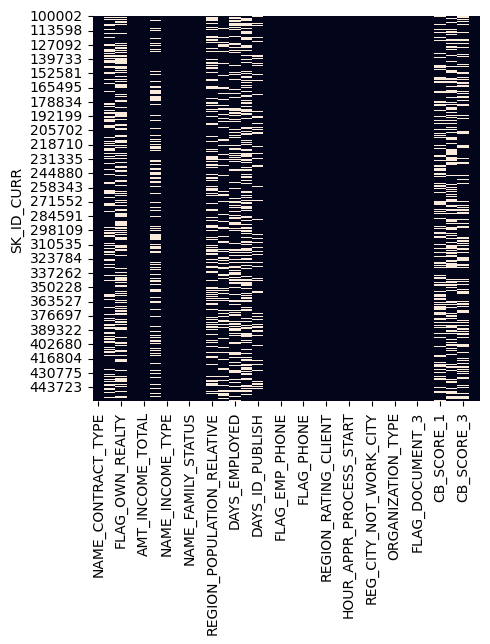

In [7]:
#결측치 DISPLAY
plt.figure(figsize=(5,5))
sns.heatmap(Data.isna(),cbar=False)

In [8]:

# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
#결측치 퍼센테이지 디스플레이

missing_values = missing_values_table(Data)
missing_values.head(20)

Your selected dataframe has 34 columns.
There are 11 columns that have missing values.


,Missing Values,% of Total Values
DAYS_REGISTRATION,9733,40.6
FLAG_OWN_REALTY,9571,39.9
CB_SCORE_2,8274,34.5
AMT_CREDIT,7300,30.4
REGION_POPULATION_RELATIVE,7149,29.8
DAYS_EMPLOYED,7149,29.8
CB_SCORE_3,7108,29.6
CODE_GENDER,7094,29.6
CB_SCORE_1,6146,25.6
DAYS_BIRTH,4749,19.8


/tmp/ipykernel_25349/959533699.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = Data.corr(), annot=True,


<Axes: >

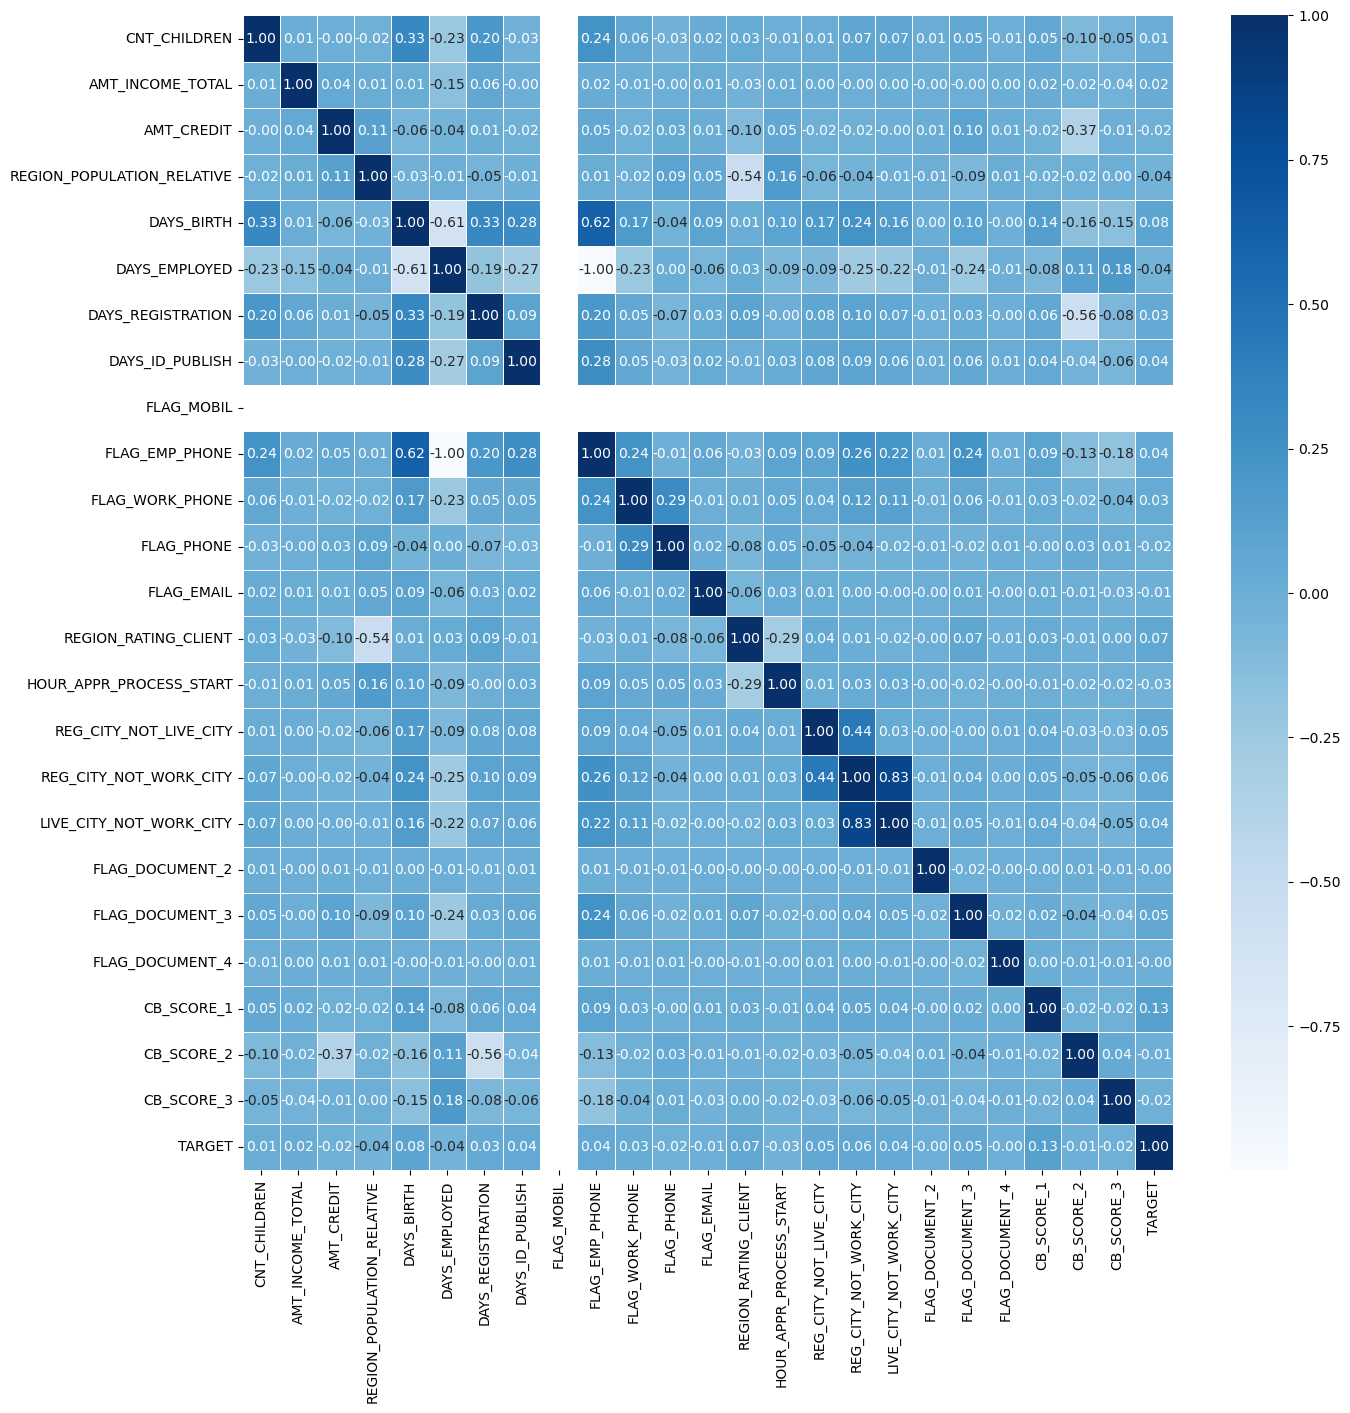

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(data = Data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')


In [11]:
#NAME_CONTRACT_TYPE 값 치환  


Data['NAME_CONTRACT_TYPE'] = Data['NAME_CONTRACT_TYPE'].replace('Cash loans', '0')
Data['NAME_CONTRACT_TYPE'] = Data['NAME_CONTRACT_TYPE'].replace('Revolving loans', '1')

In [12]:
#FLAG_OWN_REALTY 값 치환

Data['FLAG_OWN_REALTY'] = Data['FLAG_OWN_REALTY'].fillna(0)
Data['FLAG_OWN_REALTY'] = Data['FLAG_OWN_REALTY'].replace('Y', '1')
Data['FLAG_OWN_REALTY'] = Data['FLAG_OWN_REALTY'].replace('N', '0')
Data['FLAG_OWN_REALTY'] = Data['FLAG_OWN_REALTY'].replace(0, '0')

In [13]:

# floor - 소수점자리를 내림하여 없앰
Data['AMT_INCOME_TOTAL'] = Data['AMT_INCOME_TOTAL'].apply(np.floor)

In [14]:

# 현금금액 0으로 대체
Data['AMT_CREDIT'] = Data['AMT_CREDIT'].fillna(0)
# floor - 수점자리를 내림하여 없앰
Data['AMT_CREDIT'] = Data['AMT_CREDIT'].apply(np.floor)


/opt/conda/envs/python3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/python3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/python3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/python3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/python3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.pri

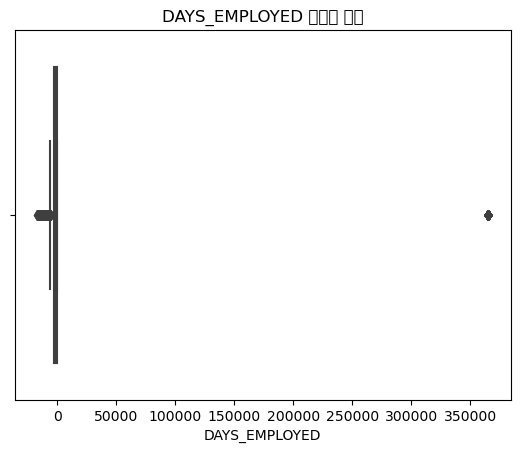

In [15]:
# 데이터프레임의 'DAYS_EMPLOYED'에 대한 상자 그림 그리기
sns.boxplot(x=Data['DAYS_EMPLOYED'])
plt.xlabel('DAYS_EMPLOYED')
plt.title('DAYS_EMPLOYED 데이터 분포')
plt.show()

Text(0.5, 1.0, 'DAYS_EMPLOYED')

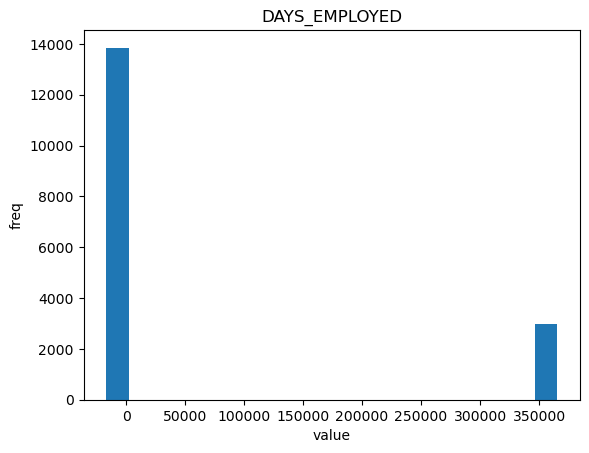

In [16]:
# 이상치 제거를 위한 데이터 파악 

plt.hist(Data['DAYS_EMPLOYED'], bins=20)  
plt.xlabel('value')
plt.ylabel('freq')
plt.title('DAYS_EMPLOYED')

In [17]:
# "DAYS_EMPLOYED" 컬럼의 null 값을 "ORGANIZATION_TYPE"의 평균값으로 대체
mean_days_employed_by_org = Data.groupby('ORGANIZATION_TYPE')['DAYS_EMPLOYED'].mean()
Data['DAYS_EMPLOYED'].fillna(Data['ORGANIZATION_TYPE'].map(mean_days_employed_by_org), inplace=True)


In [18]:
Data['DAYS_EMPLOYED'] = Data['DAYS_EMPLOYED'].apply(np.floor)
Data['DAYS_EMPLOYED']

SK_ID_CURR
100002      -637.0
100004     -2946.0
100020     -2946.0
100029      -746.0
100048      -475.0
            ...   
456095    365243.0
456117     -1891.0
456118     -1891.0
456142     -3639.0
456228     -1891.0
Name: DAYS_EMPLOYED, Length: 24000, dtype: float64

In [19]:
# 이상치 제거 처리 

Data['DAYS_EMPLOYED'] = Data['DAYS_EMPLOYED'].replace(365243.0,365)
Data['DAYS_EMPLOYED']

SK_ID_CURR
100002    -637.0
100004   -2946.0
100020   -2946.0
100029    -746.0
100048    -475.0
           ...  
456095     365.0
456117   -1891.0
456118   -1891.0
456142   -3639.0
456228   -1891.0
Name: DAYS_EMPLOYED, Length: 24000, dtype: float64

In [20]:
#Data.groupby('ORGANIZATION_TYPE')['DAYS_EMPLOYED'].mean()
#ORGANIZATION_TYPE
#DAYS_EMPLOYED

In [21]:
# 365243 -> 365 -> 1
# null   -> 고용형태의 mean 으로 치환 

Data['DAYS_EMPLOYED'] = Data['DAYS_EMPLOYED'] / 365
Data['DAYS_EMPLOYED'] = abs(Data['DAYS_EMPLOYED'])


In [22]:
#Data['DAYS_EMPLOYED'] = Data['DAYS_EMPLOYED'].apply(np.floor)
Data['DAYS_EMPLOYED']

SK_ID_CURR
100002    1.745205
100004    8.071233
100020    8.071233
100029    2.043836
100048    1.301370
            ...   
456095    1.000000
456117    5.180822
456118    5.180822
456142    9.969863
456228    5.180822
Name: DAYS_EMPLOYED, Length: 24000, dtype: float64

In [23]:
#DAYS_EMPLOYED max 값으로 치환

max_days_employed = Data['DAYS_EMPLOYED'].max()
Data.loc[Data['DAYS_EMPLOYED'] == 1.000000, 'DAYS_EMPLOYED'] = max_days_employed


In [24]:
Data['DAYS_EMPLOYED']

SK_ID_CURR
100002     1.745205
100004     8.071233
100020     8.071233
100029     2.043836
100048     1.301370
            ...    
456095    46.169863
456117     5.180822
456118     5.180822
456142     9.969863
456228     5.180822
Name: DAYS_EMPLOYED, Length: 24000, dtype: float64

In [25]:
print(Data.isnull().sum())

NAME_CONTRACT_TYPE               0
CODE_GENDER                   7094
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE    7149
DAYS_BIRTH                    4749
DAYS_EMPLOYED                    0
DAYS_REGISTRATION             9733
DAYS_ID_PUBLISH               4741
FLAG_MOBIL                       0
FLAG_EMP_PHONE                   0
FLAG_WORK_PHONE                  0
FLAG_PHONE                       0
FLAG_EMAIL                       0
REGION_RATING_CLIENT             0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
REG_CITY_NOT_LIVE_CITY           0
REG_CITY_NOT_WORK_CITY           0
LIVE_CITY_NOT_WORK_CITY          0
ORGANIZATION_TYPE                0
FLAG_DOCUMENT_2                  0
FLAG_DOCUMENT_3     

In [26]:
# "DAYS_REGISTRATION" 컬럼의 null 값을 "CB_scnore_2"의 평균값으로 대체  corr -0.56
mean_days_employed_by_org = Data.groupby('DAYS_BIRTH')['DAYS_REGISTRATION'].mean()
Data['DAYS_REGISTRATION'].fillna(Data['CB_SCORE_2'].map(mean_days_employed_by_org), inplace=True)


# "DAYS_REGISTRATION" 컬럼의 null 값을 "DAYS_BIRTH"의 평균값으로 대체  corr 0.33

mean_days_employed_by_org = Data.groupby('DAYS_BIRTH')['DAYS_REGISTRATION'].mean()
Data['DAYS_REGISTRATION'].fillna(Data['DAYS_BIRTH'].map(mean_days_employed_by_org), inplace=True)


# '컬럼명' 컬럼의 평균 값을 계산
mean_value = Data['DAYS_REGISTRATION'].mean()

# 결측치(null 또는 NaN)를 평균 값으로 대체
Data['DAYS_REGISTRATION'].fillna(mean_value, inplace=True)

Data['DAYS_REGISTRATION']


SK_ID_CURR
100002   -3648.000000
100004   -4260.000000
100020   -3538.000000
100029    -108.000000
100048   -4982.468153
             ...     
456095   -4061.000000
456117    -106.000000
456118   -4982.468153
456142   -4288.000000
456228   -4982.468153
Name: DAYS_REGISTRATION, Length: 24000, dtype: float64

In [27]:

Data['DAYS_REGISTRATION'] = Data['DAYS_REGISTRATION'] / 365
Data['DAYS_REGISTRATION'] = abs(Data['DAYS_REGISTRATION'])
Data['DAYS_REGISTRATION'] = Data['DAYS_REGISTRATION'].apply(np.floor)

Data['DAYS_REGISTRATION'].corr(Data['TARGET'])

-0.024846137903604043

In [28]:

# "DAYS_ID_PUBLISH" 컬럼의 null 값을 "ORGANIZATION_TYPE"의 평균값으로 대체  corr 0.33

mean_days_employed_by_org = Data.groupby('ORGANIZATION_TYPE')['DAYS_ID_PUBLISH'].mean()
Data['DAYS_ID_PUBLISH'].fillna(Data['ORGANIZATION_TYPE'].map(mean_days_employed_by_org), inplace=True)

# '컬럼명' 컬럼의 평균 값을 계산
mean_value = Data['DAYS_ID_PUBLISH'].mean()

# 결측치(null 또는 NaN)를 평균 값으로 대체
Data['DAYS_ID_PUBLISH'].fillna(mean_value, inplace=True)


In [ ]:

Data['DAYS_ID_PUBLISH'] = Data['DAYS_ID_PUBLISH'] / 365
Data['DAYS_ID_PUBLISH'] = abs(Data['DAYS_ID_PUBLISH'])
Data['DAYS_ID_PUBLISH'] = Data['DAYS_ID_PUBLISH'].apply(np.floor)

Data['DAYS_ID_PUBLISH'].corr(Data['TARGET'])

-0.04261812527806805

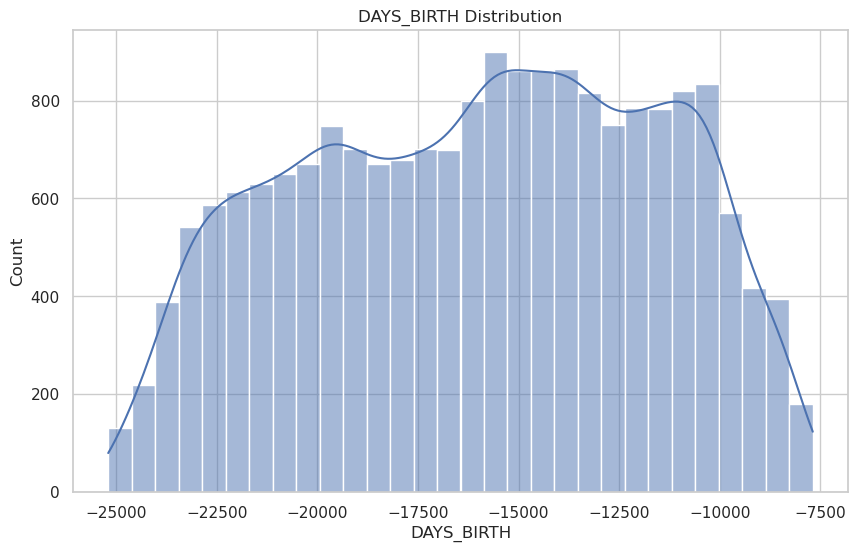

In [30]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.histplot(Data['DAYS_BIRTH'], bins=30, kde=True)
plt.title('DAYS_BIRTH Distribution')
plt.xlabel('DAYS_BIRTH')
plt.ylabel('Count')

plt.show()

In [31]:

# "DAYS_BIRTH" 컬럼의 null 값을 "DAYS_EMPLOYED"의 평균값으로 대체  corr -0.66

mean_days_employed_by_org = Data.groupby('DAYS_EMPLOYED')['DAYS_BIRTH'].mean()
Data['DAYS_BIRTH'].fillna(Data['DAYS_EMPLOYED'].map(mean_days_employed_by_org), inplace=True)

# "DAYS_BIRTH" 컬럼의 null 값을 "FLAG_EMP_PHONE"의 평균값으로 대체  corr -0.95

mean_days_employed_by_org = Data.groupby('FLAG_EMP_PHONE')['DAYS_BIRTH'].mean()
Data['DAYS_BIRTH'].fillna(Data['FLAG_EMP_PHONE'].map(mean_days_employed_by_org), inplace=True)


Data['DAYS_BIRTH'] = Data['DAYS_BIRTH'] / 365
Data['DAYS_BIRTH'] = abs(Data['DAYS_BIRTH'])
Data['DAYS_BIRTH'] = Data['DAYS_BIRTH'].apply(np.floor)

Data['DAYS_BIRTH'].corr(Data['TARGET'])


-0.07448304527790636

In [32]:
#REGION_RATING_CLIENT


# "REGION_POPULATION_RELATIVE" 컬럼의 null 값을 "REGION_RATING_CLIENT"의 평균값으로 대체  corr -0.54

mean_days_employed_by_org = Data.groupby('REGION_RATING_CLIENT')['REGION_POPULATION_RELATIVE'].mean()
Data['REGION_POPULATION_RELATIVE'].fillna(Data['REGION_RATING_CLIENT'].map(mean_days_employed_by_org), inplace=True)

In [33]:
Data['REGION_POPULATION_RELATIVE'] = Data['REGION_POPULATION_RELATIVE'].apply(lambda x: round(x, 3))


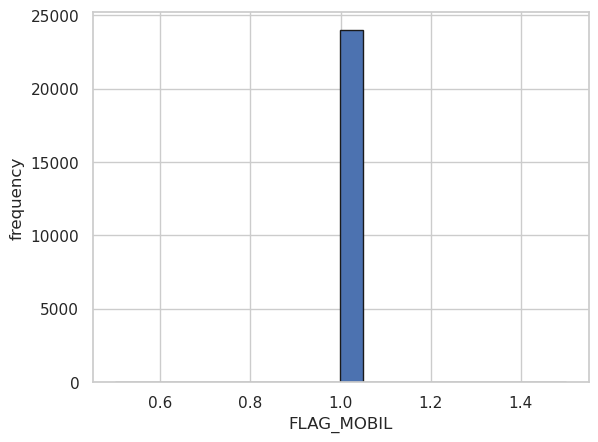

In [34]:
plt.hist(Data['FLAG_MOBIL'], bins=20, edgecolor='k')  # 히스토그램 그리기
plt.xlabel('FLAG_MOBIL')  # x축 레이블 설정 (선택 사항)
plt.ylabel('frequency')     # y축 레이블 설정 (선택 사항)
plt.grid(True)  # 그리드 표시 (선택 사항)
plt.show()  # 그래프 보여주기

In [35]:
## FLAG_MOBIL 은 모두 1의 값으로 DROP
# TARGET DROP 
Data = Data.drop(columns='FLAG_MOBIL')

In [36]:
print(Data.isnull().sum())

NAME_CONTRACT_TYPE               0
CODE_GENDER                   7094
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
DAYS_ID_PUBLISH                  0
FLAG_EMP_PHONE                   0
FLAG_WORK_PHONE                  0
FLAG_PHONE                       0
FLAG_EMAIL                       0
REGION_RATING_CLIENT             0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
REG_CITY_NOT_LIVE_CITY           0
REG_CITY_NOT_WORK_CITY           0
LIVE_CITY_NOT_WORK_CITY          0
ORGANIZATION_TYPE                0
FLAG_DOCUMENT_2                  0
FLAG_DOCUMENT_3                  0
FLAG_DOCUMENT_4     

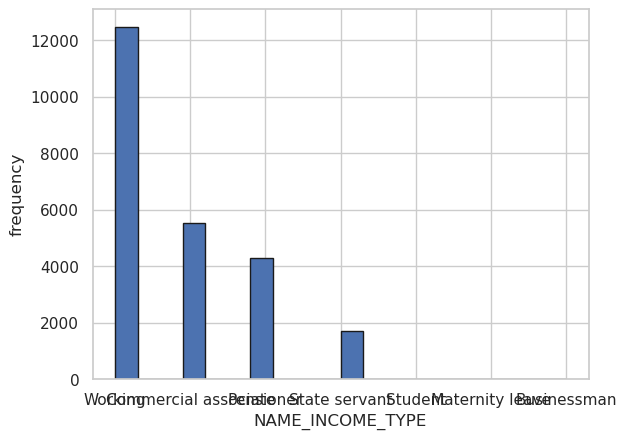

In [37]:
plt.hist(Data['NAME_INCOME_TYPE'], bins=20, edgecolor='k')  # 히스토그램 그리기
plt.xlabel('NAME_INCOME_TYPE')  # x축 레이블 설정 (선택 사항)
plt.ylabel('frequency')     # y축 레이블 설정 (선택 사항)
plt.grid(True)  # 그리드 표시 (선택 사항)
plt.show()  # 그래프 보여주기

In [38]:
one_hot_encoded = pd.get_dummies(Data['NAME_INCOME_TYPE'], prefix='NAME_INCOME_TYPE')

# 기존 'NAME_INCOME_TYPE' 컬럼 제거
Data = Data.drop(['NAME_INCOME_TYPE'], axis=1)

# 인코딩된 컬럼을 데이터프레임에 추가
Data = pd.concat([Data, one_hot_encoded], axis=1)


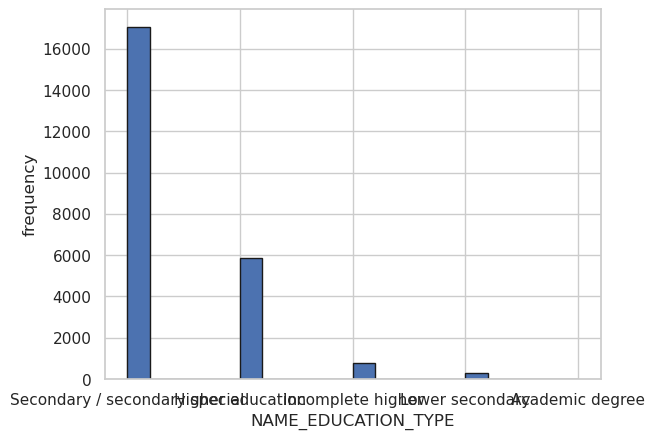

In [39]:
plt.hist(Data['NAME_EDUCATION_TYPE'], bins=20, edgecolor='k')  # 히스토그램 그리기
plt.xlabel('NAME_EDUCATION_TYPE')  # x축 레이블 설정 (선택 사항)
plt.ylabel('frequency')     # y축 레이블 설정 (선택 사항)
plt.grid(True)  # 그리드 표시 (선택 사항)
plt.show()  # 그래프 보여주기

In [40]:
#데이터 원핫 인코딩 'NAME_EDUCATION_TYPE'
 
one_hot_encoded = pd.get_dummies(Data['NAME_EDUCATION_TYPE'], prefix='NAME_EDUCATION_TYPE')

# 기존 'NAME_INCOME_TYPE' 컬럼 제거
Data = Data.drop(['NAME_EDUCATION_TYPE'], axis=1)

# 인코딩된 컬럼을 데이터프레임에 추가
Data = pd.concat([Data, one_hot_encoded], axis=1)


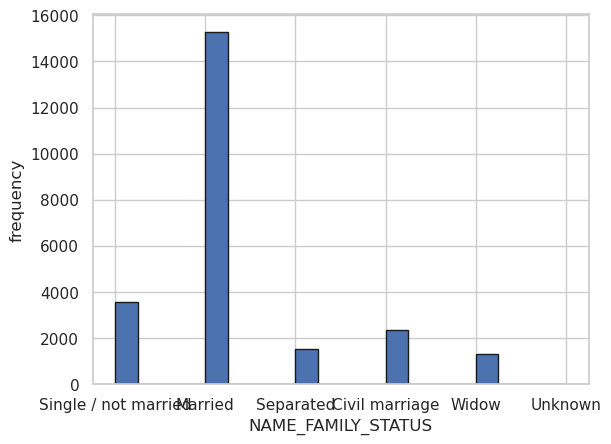

In [41]:
plt.hist(Data['NAME_FAMILY_STATUS'], bins=20, edgecolor='k')  # 히스토그램 그리기
plt.xlabel('NAME_FAMILY_STATUS')  # x축 레이블 설정 (선택 사항)
plt.ylabel('frequency')     # y축 레이블 설정 (선택 사항)
plt.grid(True)  # 그리드 표시 (선택 사항)
plt.show()  # 그래프 보여주기

In [42]:
Data['NAME_FAMILY_STATUS'].value_counts()

Married                 15275
Single / not married     3557
Civil marriage           2336
Separated                1527
Widow                    1304
Unknown                     1
Name: NAME_FAMILY_STATUS, dtype: int64

In [43]:
# 결혼 1 비 결혼 0 으로 구분 

Data['NAME_FAMILY_STATUS'] = Data['NAME_FAMILY_STATUS'].replace('Married', '1')
Data['NAME_FAMILY_STATUS'] = Data['NAME_FAMILY_STATUS'].replace('Single / not married', '0')
Data['NAME_FAMILY_STATUS'] = Data['NAME_FAMILY_STATUS'].replace('Separated', '0')
Data['NAME_FAMILY_STATUS'] = Data['NAME_FAMILY_STATUS'].replace('Civil marriage', '1')
Data['NAME_FAMILY_STATUS'] = Data['NAME_FAMILY_STATUS'].replace('Widow', '0')
Data['NAME_FAMILY_STATUS'] = Data['NAME_FAMILY_STATUS'].replace('Unknown', '0')



In [44]:
Data['NAME_FAMILY_STATUS'].value_counts()

1    17611
0     6389
Name: NAME_FAMILY_STATUS, dtype: int64

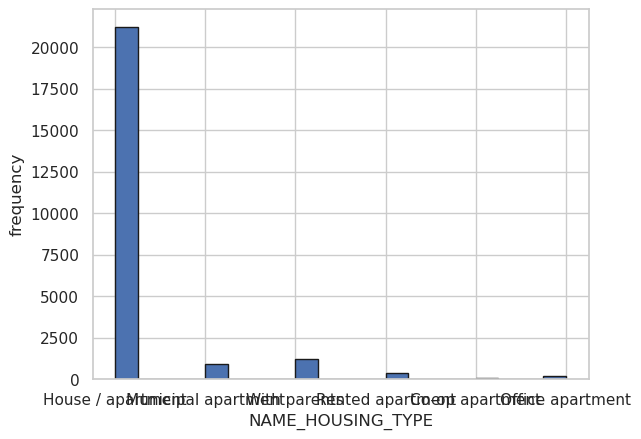

In [45]:
plt.hist(Data['NAME_HOUSING_TYPE'], bins=20, edgecolor='k')  # 히스토그램 그리기
plt.xlabel('NAME_HOUSING_TYPE')  # x축 레이블 설정 (선택 사항)
plt.ylabel('frequency')     # y축 레이블 설정 (선택 사항)
plt.grid(True)  # 그리드 표시 (선택 사항)
plt.show()  # 그래프 보여주기

In [46]:
#데이터 원핫 인코딩 'NAME_HOUSING_TYPE'
 

one_hot_encoded = pd.get_dummies(Data['NAME_HOUSING_TYPE'], prefix='NAME_HOUSING_TYPE')

# 기존 'NAME_INCOME_TYPE' 컬럼 제거
Data = Data.drop(['NAME_HOUSING_TYPE'], axis=1)

# 인코딩된 컬럼을 데이터프레임에 추가
Data = pd.concat([Data, one_hot_encoded], axis=1)


In [47]:
Data['WEEKDAY_APPR_PROCESS_START'].value_counts()


TUESDAY      4135
WEDNESDAY    4071
FRIDAY       3995
MONDAY       3977
THURSDAY     3843
SATURDAY     2592
SUNDAY       1387
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [48]:
#데이터 원핫 인코딩 'WEEKDAY_APPR_PROCESS_START' to ''DAY ~' 
 

one_hot_encoded = pd.get_dummies(Data['WEEKDAY_APPR_PROCESS_START'], prefix='DAY')

# 기존 'NAME_INCOME_TYPE' 컬럼 제거
Data = Data.drop(['WEEKDAY_APPR_PROCESS_START'], axis=1)

# 인코딩된 컬럼을 데이터프레임에 추가
Data = pd.concat([Data, one_hot_encoded], axis=1)


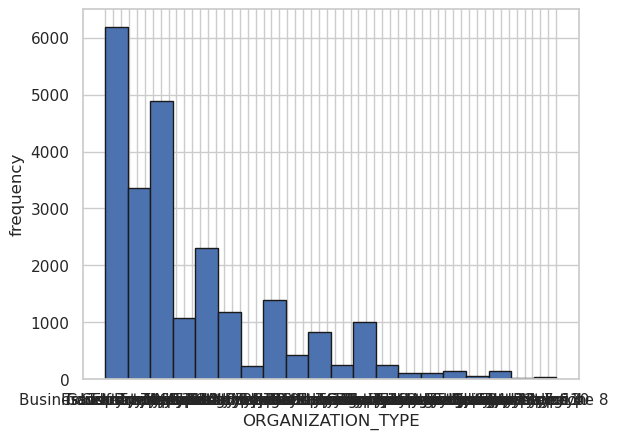

In [49]:
#ORGANIZATION_TYPE 데이터 분포 

plt.hist(Data['ORGANIZATION_TYPE'], bins=20, edgecolor='k')  # 히스토그램 그리기
plt.xlabel('ORGANIZATION_TYPE')  # x축 레이블 설정 (선택 사항)
plt.ylabel('frequency')     # y축 레이블 설정 (선택 사항)
plt.grid(True)  # 그리드 표시 (선택 사항)
plt.show()  # 그래프 보여주기

In [50]:
# ORGANIZATION_TYPE  -> 데이터 축소
# 조건에 따라 값을 변경
mask = Data['ORGANIZATION_TYPE'].str.startswith('Business')
Data.loc[mask, 'ORGANIZATION_TYPE'] = 'Business'

mask = Data['ORGANIZATION_TYPE'].str.startswith('Trade')
Data.loc[mask, 'ORGANIZATION_TYPE'] = 'Trade'

mask = Data['ORGANIZATION_TYPE'].str.startswith('Industry')
Data.loc[mask, 'ORGANIZATION_TYPE'] = 'Industry'

mask = Data['ORGANIZATION_TYPE'].str.startswith('Transport')
Data.loc[mask, 'ORGANIZATION_TYPE'] = 'Transport'

exclude_values = set(['Business', 'Trade', 'Industry','Transport'])
filtered_values = [value if value in exclude_values else 'Others' for value in Data['ORGANIZATION_TYPE']]

# 데이터프레임 업데이트
Data['ORGANIZATION_TYPE'] = filtered_values


In [51]:
Data['ORGANIZATION_TYPE'].value_counts()


Others       14414
Business      6573
Trade         1161
Industry      1135
Transport      717
Name: ORGANIZATION_TYPE, dtype: int64

In [52]:
#데이터 원핫 인코딩 'ORGANIZATION_TYPE' to ''WORK_TYPE ~' 
 

one_hot_encoded = pd.get_dummies(Data['ORGANIZATION_TYPE'], prefix='WORK_TYPE')

# 기존 'NAME_INCOME_TYPE' 컬럼 제거
Data = Data.drop(['ORGANIZATION_TYPE'], axis=1)

# 인코딩된 컬럼을 데이터프레임에 추가
Data = pd.concat([Data, one_hot_encoded], axis=1)


In [53]:
# 결측치가 있는 컬럼명 출력
columns_with_missing_values = Data.columns[Data.isna().any()]

# 결과 출력
print("결측치가 있는 컬럼명:")
print(columns_with_missing_values)

결측치가 있는 컬럼명:
Index(['CODE_GENDER', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3'], dtype='object')


In [54]:

# max, min 도 해볼 수 있지만, 상관관계가 높은 것에 대해 너무 가공하면 성능이 오히려 떨어질 수 있으므로 mean과 std 만 구함
# CB_SCORE_1 CB_SCORE_2 CB_SCORE_3
Data['CB_SCORE_MEAN'] = Data[['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']].mean(axis=1)
Data['CB_SCORE_STD'] = Data[['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']].std(axis=1)
Data[['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'CB_SCORE_STD', 'CB_SCORE_MEAN']].head(10)


,CB_SCORE_1,CB_SCORE_2,CB_SCORE_3,CB_SCORE_STD,CB_SCORE_MEAN
SK_ID_CURR,,,,,
100002,NaN,NaN,58.349224,NaN,58.349224
100004,26.499494,57.600542,46.433666,15.755134,43.511234
100020,NaN,63.496369,NaN,NaN,63.496369
100029,82.376245,45.996152,68.694333,18.375316,65.688910
100048,66.199985,NaN,NaN,NaN,66.199985
100056,38.358614,47.467175,NaN,6.440725,42.912894
100061,NaN,61.701918,NaN,NaN,61.701918
100100,49.904756,NaN,59.403718,6.716780,54.654237
100102,NaN,NaN,64.084047,NaN,64.084047


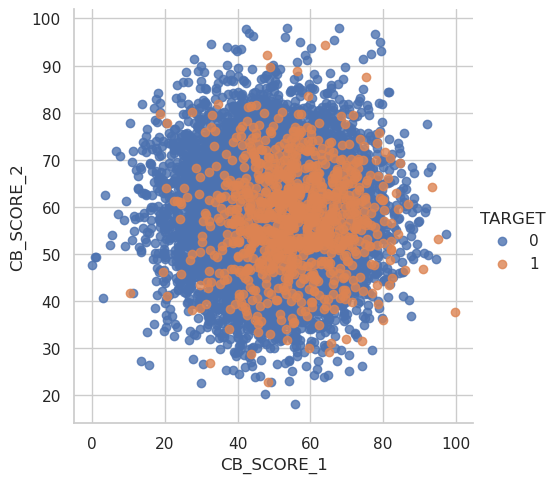

In [55]:
sns.lmplot(data=Data, x='CB_SCORE_1', y='CB_SCORE_2', fit_reg=False, hue='TARGET')

In [56]:

# NULL 값을 표준편차의 평균으로 대체
Data['CB_SCORE_STD'] = Data['CB_SCORE_STD'].fillna(Data['CB_SCORE_STD'].mean())

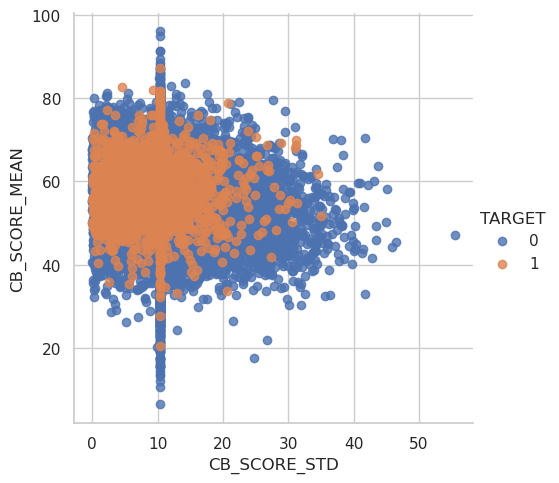

In [57]:
sns.lmplot(data=Data, x='CB_SCORE_STD', y='CB_SCORE_MEAN', fit_reg=False, hue='TARGET')

In [58]:

# TARGET DROP 

Data.drop(columns=['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3',
       'CB_SCORE_MEAN'], inplace=True)


In [59]:
Data = Data[['NAME_CONTRACT_TYPE','CODE_GENDER',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'NAME_FAMILY_STATUS',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'HOUR_APPR_PROCESS_START',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'NAME_INCOME_TYPE_Businessman',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Maternity leave',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Student',
 'NAME_INCOME_TYPE_Working',
 'NAME_EDUCATION_TYPE_Academic degree',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Incomplete higher',
 'NAME_EDUCATION_TYPE_Lower secondary',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_HOUSING_TYPE_Co-op apartment',
 'NAME_HOUSING_TYPE_House / apartment',
 'NAME_HOUSING_TYPE_Municipal apartment',
 'NAME_HOUSING_TYPE_Office apartment',
 'NAME_HOUSING_TYPE_Rented apartment',
 'NAME_HOUSING_TYPE_With parents',
 'DAY_FRIDAY',
 'DAY_MONDAY',
 'DAY_SATURDAY',
 'DAY_SUNDAY',
 'DAY_THURSDAY',
 'DAY_TUESDAY',
 'DAY_WEDNESDAY',
 'WORK_TYPE_Business',
 'WORK_TYPE_Industry',
 'WORK_TYPE_Others',
 'WORK_TYPE_Trade',
 'WORK_TYPE_Transport',
 'CB_SCORE_STD',
 'TARGET']]

<Figure size 1000x600 with 0 Axes>

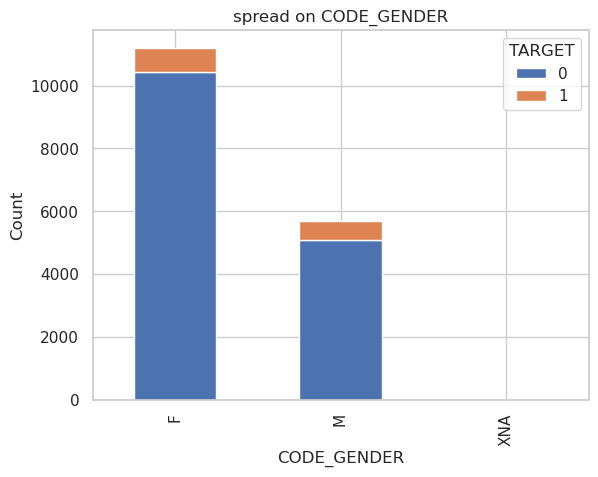

In [60]:
plt.figure(figsize=(10, 6))
Data.groupby('CODE_GENDER')['TARGET'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.xlabel('CODE_GENDER')
plt.ylabel('Count')
plt.title('spread on CODE_GENDER')
plt.legend(title='TARGET')
plt.show()

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [62]:
#결측치율이 높은 gender에 대하여 랜덤포레스트 알고리즘을 이용하여 데이터 입력

# 학습 데이터 (결측치가 아닌 행) 선택
train_data = Data.dropna(subset=['CODE_GENDER'])

# 특성 선택
X_train = train_data[['NAME_CONTRACT_TYPE',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'NAME_FAMILY_STATUS',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'HOUR_APPR_PROCESS_START',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'TARGET',
 'NAME_INCOME_TYPE_Businessman',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Maternity leave',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Student',
 'NAME_INCOME_TYPE_Working',
 'NAME_EDUCATION_TYPE_Academic degree',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Incomplete higher',
 'NAME_EDUCATION_TYPE_Lower secondary',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_HOUSING_TYPE_Co-op apartment',
 'NAME_HOUSING_TYPE_House / apartment',
 'NAME_HOUSING_TYPE_Municipal apartment',
 'NAME_HOUSING_TYPE_Office apartment',
 'NAME_HOUSING_TYPE_Rented apartment',
 'NAME_HOUSING_TYPE_With parents',
 'DAY_FRIDAY',
 'DAY_MONDAY',
 'DAY_SATURDAY',
 'DAY_SUNDAY',
 'DAY_THURSDAY',
 'DAY_TUESDAY',
 'DAY_WEDNESDAY',
 'WORK_TYPE_Business',
 'WORK_TYPE_Industry',
 'WORK_TYPE_Others',
 'WORK_TYPE_Trade',
 'WORK_TYPE_Transport',
 'CB_SCORE_STD']]
y_train = train_data['CODE_GENDER']

# 모델 선택 (여기서는 랜덤 포레스트 분류기를 사용)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 결측치를 예측할 데이터 선택
predict_data = Data[Data['CODE_GENDER'].isna()][['NAME_CONTRACT_TYPE',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'NAME_FAMILY_STATUS',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'HOUR_APPR_PROCESS_START',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'TARGET',
 'NAME_INCOME_TYPE_Businessman',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Maternity leave',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Student',
 'NAME_INCOME_TYPE_Working',
 'NAME_EDUCATION_TYPE_Academic degree',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Incomplete higher',
 'NAME_EDUCATION_TYPE_Lower secondary',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_HOUSING_TYPE_Co-op apartment',
 'NAME_HOUSING_TYPE_House / apartment',
 'NAME_HOUSING_TYPE_Municipal apartment',
 'NAME_HOUSING_TYPE_Office apartment',
 'NAME_HOUSING_TYPE_Rented apartment',
 'NAME_HOUSING_TYPE_With parents',
 'DAY_FRIDAY',
 'DAY_MONDAY',
 'DAY_SATURDAY',
 'DAY_SUNDAY',
 'DAY_THURSDAY',
 'DAY_TUESDAY',
 'DAY_WEDNESDAY',
 'WORK_TYPE_Business',
 'WORK_TYPE_Industry',
 'WORK_TYPE_Others',
 'WORK_TYPE_Trade',
 'WORK_TYPE_Transport',
 'CB_SCORE_STD']]

# 결측치 예측
predicted_gender = model.predict(predict_data)

# 예측값을 원래 데이터프레임에 적용
Data.loc[Data['CODE_GENDER'].isna(), 'CODE_GENDER'] = predicted_gender

# 결과 출력
print(Data)


           NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  CNT_CHILDREN  \
SK_ID_CURR                                                                
100002                      0           M               1             0   
100004                      1           F               0             0   
100020                      0           M               0             0   
100029                      0           M               0             2   
100048                      0           M               1             0   
...                       ...         ...             ...           ...   
456095                      0           F               0             0   
456117                      0           F               0             1   
456118                      0           M               1             0   
456142                      0           F               0             1   
456228                      0           M               0             0   

            AMT_INCOME_T

In [63]:
#GENDER 분포 

Data['CODE_GENDER'].value_counts()


F      17087
M       6912
XNA        1
Name: CODE_GENDER, dtype: int64

In [64]:
#이상치 제거 및 데이터 형식 변환 

Data['CODE_GENDER'] = Data['CODE_GENDER'].replace('M', 1)
Data['CODE_GENDER'] = Data['CODE_GENDER'].replace('XNA', 1)


Data['CODE_GENDER'] = Data['CODE_GENDER'].replace('F', 0)


Data['NAME_CONTRACT_TYPE']  =Data['NAME_CONTRACT_TYPE'].replace('0',0)
Data['NAME_CONTRACT_TYPE']  =Data['NAME_CONTRACT_TYPE'].replace('1',1)


Data['FLAG_OWN_REALTY']  =Data['FLAG_OWN_REALTY'].replace('0',0)
Data['FLAG_OWN_REALTY']  =Data['FLAG_OWN_REALTY'].replace('1',1)


Data['NAME_FAMILY_STATUS']  =Data['NAME_FAMILY_STATUS'].replace('0',0)
Data['NAME_FAMILY_STATUS']  =Data['NAME_FAMILY_STATUS'].replace('1',1)


In [65]:
Data['NAME_FAMILY_STATUS'].value_counts()

1    17611
0     6389
Name: NAME_FAMILY_STATUS, dtype: int64

In [66]:
df = pd.DataFrame(Data)

# 컬럼의 개수 확인
column_count = df.shape[1]

print(column_count)

56


<Axes: >

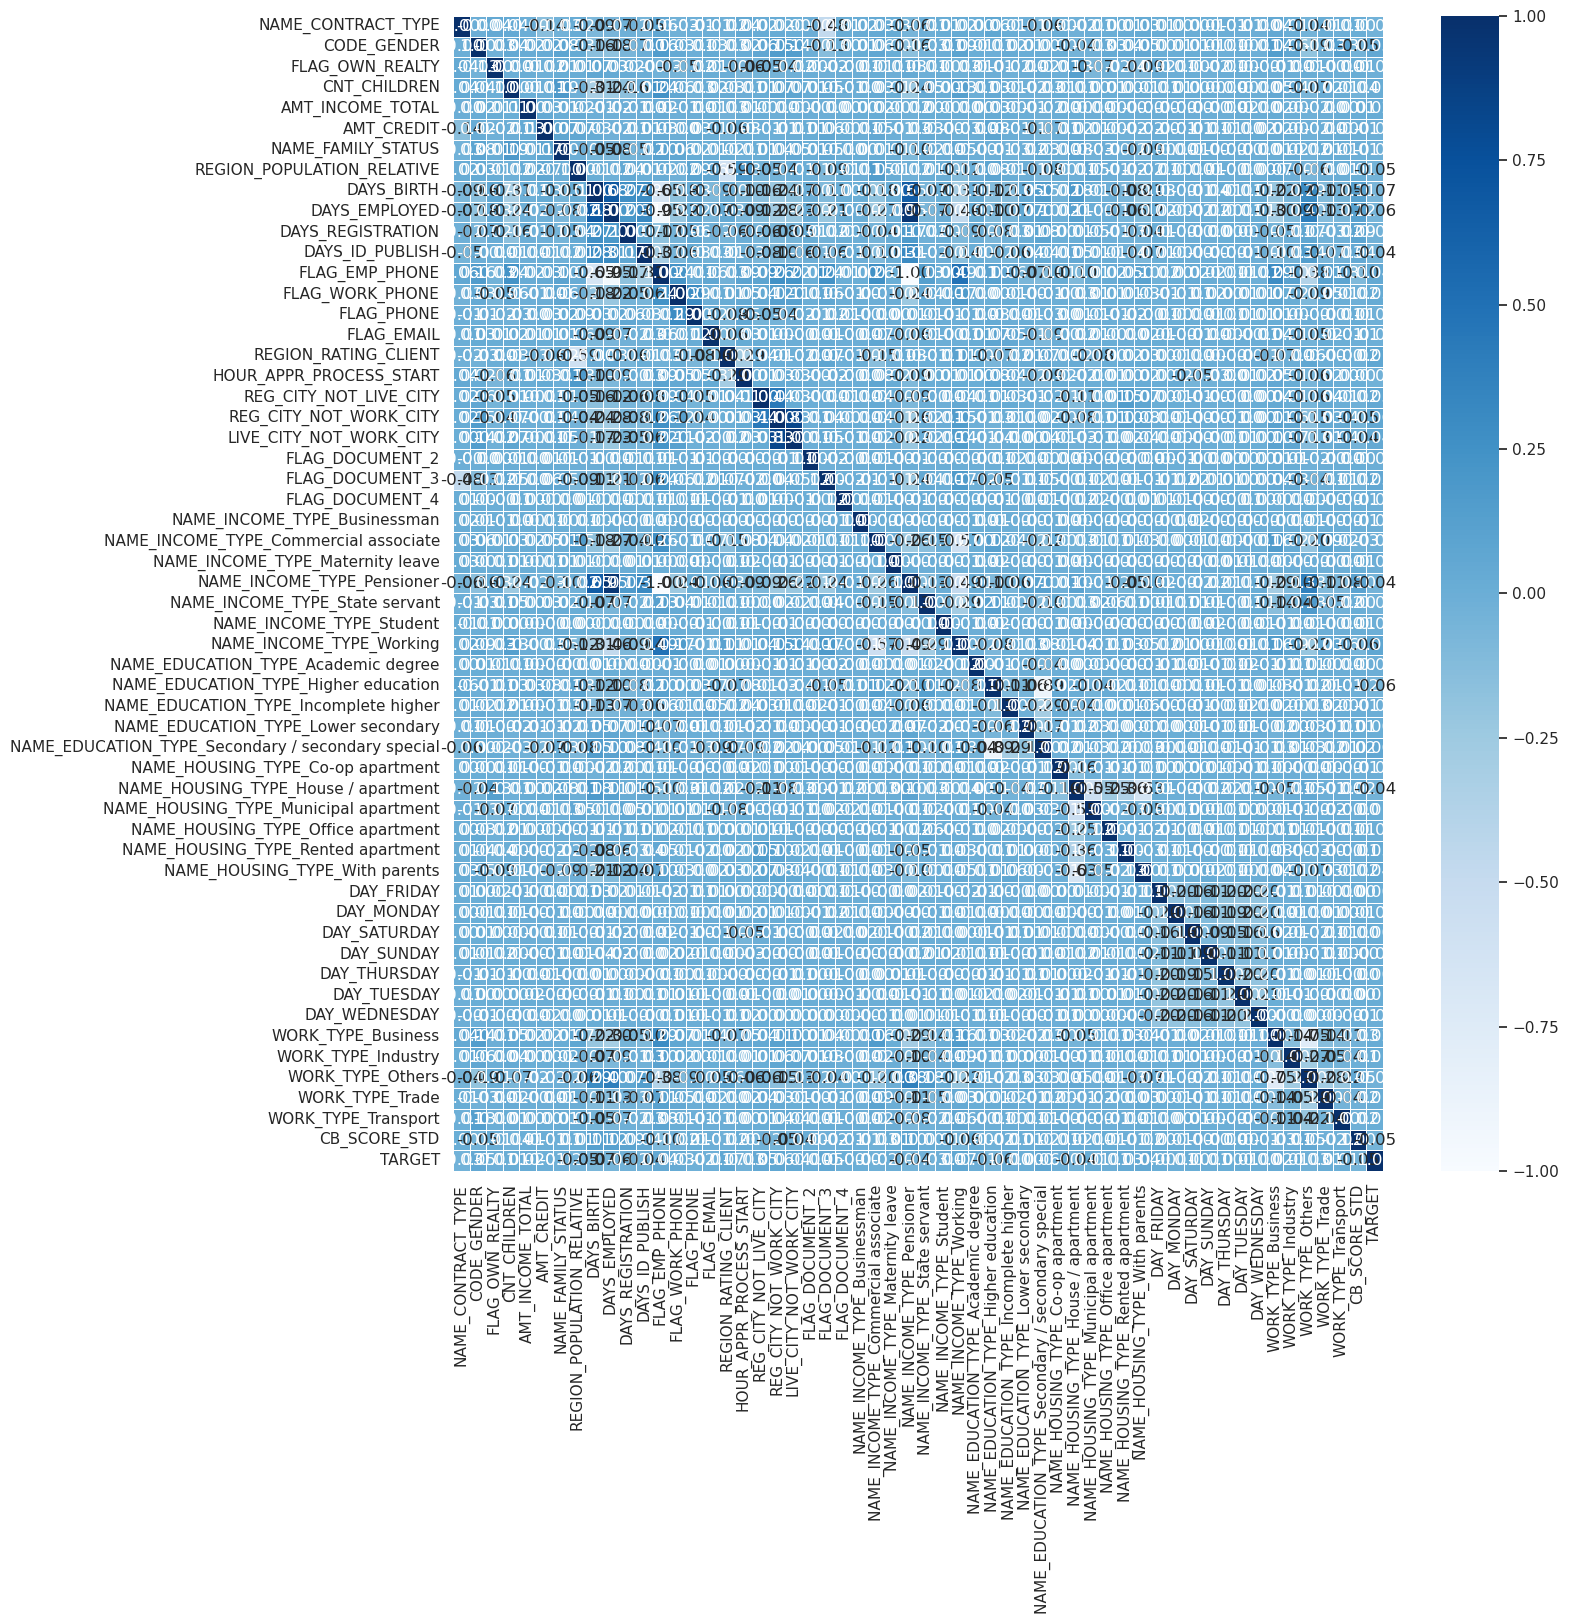

In [67]:
plt.figure(figsize=(15,15))
sns.heatmap(data = Data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')


In [68]:
#모델 학습 START 
temp = Data

train = temp.sample(frac=0.70,random_state=777)
#len(train)
test = temp.drop(train.index)
len(test)


7200

In [69]:
print(train.shape)
print(test.shape)

(16800, 56)
(7200, 56)


In [70]:
from sklearn.tree import DecisionTreeClassifier
# 의사결정나무

In [71]:
Ytrain = train['TARGET']
Ytest = test['TARGET']

Xtrain = train.iloc[:, :-1]
Xtest = test.iloc[:, :-1]
feature_names =list(test)

print(Xtrain.shape)
print(Xtest.shape)

(16800, 55)
(7200, 55)


In [72]:
# 결측치가 있는 컬럼명 출력
columns_with_missing_values = Data.columns[Data.isna().any()]

# 결과 출력
print("결측치가 있는 컬럼명:")
print(columns_with_missing_values)

결측치가 있는 컬럼명:
Index([], dtype='object')


In [73]:
#데이터 min-max 스케일 조정 

from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
Xtrain = min_max.fit_transform(Xtrain)
Xtest = min_max.fit_transform(Xtest)

In [74]:
import numpy as np

X_train_mean = np.mean(Xtrain)
X_train_std = np.std(Xtrain)

Xtrain = (Xtrain-X_train_mean)/X_train_std

X_test_mean = np.mean(Xtest)
X_test_std = np.std(Xtest)

Xtest = (Xtest-X_test_mean)/X_test_std

In [75]:
model=DecisionTreeClassifier(max_depth=8, random_state=18)
# random_state is an arbitrary number.

model.fit(Xtrain, Ytrain)
predictions=model.predict(Xtest)

In [76]:
from sklearn.metrics import accuracy_score

y_pred_tr = model.predict(Xtest)
print('Accuracy: %.2f' % accuracy_score(Ytest, y_pred_tr))

Accuracy: 0.91


In [77]:
# 10-k Fold 실행 

from sklearn.model_selection import KFold
SPLITS = 10
kf = KFold(n_splits = SPLITS)
n_iter = 0

features = train.iloc[:,:-1]
label = pd.DataFrame(train['TARGET'])

score_list = []
for train_idx, test_idx in kf.split(features, label):
  n_iter += 1
  print(f'--------------------{n_iter}번째 KFold-------------------')
  print(f'train_idx_len : {len(train_idx)} / test_idx_len : {len(test_idx)}')

  label_train = label.iloc[train_idx]
  label_test = label.iloc[test_idx]

  X_train, X_test = features.iloc[train_idx, :], features.iloc[test_idx, :]
  y_train, y_test = label.iloc[train_idx,:], label.iloc[test_idx,:]

  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  score = accuracy_score(y_test, preds)

  print(f'{n_iter}번째 단일 accuracy_score:{score}')
  score_list.append(score)


print('======================================================')
print(f'최종 평균 accuracy_socre : {sum(score_list)/len(score_list)}')

--------------------1번째 KFold-------------------
train_idx_len : 15120 / test_idx_len : 1680
1번째 단일 accuracy_score:0.9142857142857143
--------------------2번째 KFold-------------------
train_idx_len : 15120 / test_idx_len : 1680
2번째 단일 accuracy_score:0.9148809523809524
--------------------3번째 KFold-------------------
train_idx_len : 15120 / test_idx_len : 1680
3번째 단일 accuracy_score:0.8982142857142857
--------------------4번째 KFold-------------------
train_idx_len : 15120 / test_idx_len : 1680
4번째 단일 accuracy_score:0.9101190476190476
--------------------5번째 KFold-------------------
train_idx_len : 15120 / test_idx_len : 1680
5번째 단일 accuracy_score:0.9148809523809524
--------------------6번째 KFold-------------------
train_idx_len : 15120 / test_idx_len : 1680
6번째 단일 accuracy_score:0.9154761904761904
--------------------7번째 KFold-------------------
train_idx_len : 15120 / test_idx_len : 1680
7번째 단일 accuracy_score:0.9047619047619048
--------------------8번째 KFold-------------------
train_idx_len

In [78]:
#gridSearchCV 를 통하여 변수 값 찾기 

from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [2, 3 ,4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6]
}

dtc = DecisionTreeClassifier()

grid_tree = GridSearchCV(dtc, param_grid=params, cv=3, refit=True)
grid_tree.fit(Xtrain, Ytrain)

print('best parameters : ', grid_tree.best_params_)
print('best score : ', grid_tree.best_score_)
em = grid_tree.best_estimator_
pred = em.predict(Xtest)
accuracy_score(Ytest, pred)

best parameters :  {'max_depth': 2, 'min_samples_split': 2}
best score :  0.9163095238095238


0.9184722222222222

In [79]:
#ligth BGB 를 통한 알고리즘 

import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [80]:
# 특성과 목표 변수 분리
X = temp.drop('TARGET', axis=1)
y = temp['TARGET']

# 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 데이터셋 생성
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)


# LightGBM 모델 파라미터 설정
params = {
    'objective': 'binary',  # 이진 분류 문제 설정
    'metric': 'binary_logloss',  # 손실 함수 설정
    'boosting_type': 'gbdt',
}

# 모델 학습
num_round = 100  # 반복 횟수
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# 모델 예측
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# 예측 결과를 이진 클래스로 변환
y_pred_binary = np.round(y_pred)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred_binary)
report = classification_report(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)






[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1615, number of negative: 17585
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003529 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1196
[LightGBM] [Info] Number of data points in the train set: 19200, number of used features: 49
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.084115 -> initscore=-2.387711
[LightGBM] [Info] Start training from score -2.387711
[1]	valid_0's binary_logloss: 0.27464
[2]	valid_0's binary_logloss: 0.273665
[3]	valid_0's binary_logloss: 0.273021
[4]	valid_0's binary_logloss: 0.272072
[5]	valid_0's binary_logloss: 0.271601
[6]	valid_0's binary_logloss: 0.271236
[7]	valid_0's binary_logloss: 0.270505
[8]	valid_0's binary_logloss: 0.27003
[9]	valid_0's binary_logloss: 0.26

# 데이터 전처리

In [11]:
#NAME_CONTRACT_TYPE 값 치환  


Data['NAME_CONTRACT_TYPE'] = Data['NAME_CONTRACT_TYPE'].replace('Cash loans', '0')
Data['NAME_CONTRACT_TYPE'] = Data['NAME_CONTRACT_TYPE'].replace('Revolving loans', '1')

In [12]:
#FLAG_OWN_REALTY 값 치환

Data['FLAG_OWN_REALTY'] = Data['FLAG_OWN_REALTY'].fillna(0)
Data['FLAG_OWN_REALTY'] = Data['FLAG_OWN_REALTY'].replace('Y', '1')
Data['FLAG_OWN_REALTY'] = Data['FLAG_OWN_REALTY'].replace('N', '0')
Data['FLAG_OWN_REALTY'] = Data['FLAG_OWN_REALTY'].replace(0, '0')

In [13]:

# floor - 소수점자리를 내림하여 없앰
Data['AMT_INCOME_TOTAL'] = Data['AMT_INCOME_TOTAL'].apply(np.floor)

In [14]:

# 현금금액 0으로 대체
Data['AMT_CREDIT'] = Data['AMT_CREDIT'].fillna(0)
# floor - 수점자리를 내림하여 없앰
Data['AMT_CREDIT'] = Data['AMT_CREDIT'].apply(np.floor)


In [19]:
# 이상치 제거 처리 

Data['DAYS_EMPLOYED'] = Data['DAYS_EMPLOYED'].replace(365243.0,365)
Data['DAYS_EMPLOYED']

SK_ID_CURR
100002    -637.0
100004   -2946.0
100020   -2946.0
100029    -746.0
100048    -475.0
           ...  
456095     365.0
456117   -1891.0
456118   -1891.0
456142   -3639.0
456228   -1891.0
Name: DAYS_EMPLOYED, Length: 24000, dtype: float64

In [21]:
# 365243 -> 365 -> 1
# null   -> 고용형태의 mean 으로 치환 

Data['DAYS_EMPLOYED'] = Data['DAYS_EMPLOYED'] / 365
Data['DAYS_EMPLOYED'] = abs(Data['DAYS_EMPLOYED'])


In [23]:
#DAYS_EMPLOYED max 값으로 치환

max_days_employed = Data['DAYS_EMPLOYED'].max()
Data.loc[Data['DAYS_EMPLOYED'] == 1.000000, 'DAYS_EMPLOYED'] = max_days_employed


In [27]:

Data['DAYS_REGISTRATION'] = Data['DAYS_REGISTRATION'] / 365
Data['DAYS_REGISTRATION'] = abs(Data['DAYS_REGISTRATION'])
Data['DAYS_REGISTRATION'] = Data['DAYS_REGISTRATION'].apply(np.floor)

Data['DAYS_REGISTRATION'].corr(Data['TARGET'])

-0.024846137903604043

In [ ]:

Data['DAYS_ID_PUBLISH'] = Data['DAYS_ID_PUBLISH'] / 365
Data['DAYS_ID_PUBLISH'] = abs(Data['DAYS_ID_PUBLISH'])
Data['DAYS_ID_PUBLISH'] = Data['DAYS_ID_PUBLISH'].apply(np.floor)

Data['DAYS_ID_PUBLISH'].corr(Data['TARGET'])

-0.04261812527806805

In [ ]:
Data['DAYS_BIRTH'] = Data['DAYS_BIRTH'] / 365
Data['DAYS_BIRTH'] = abs(Data['DAYS_BIRTH'])
Data['DAYS_BIRTH'] = Data['DAYS_BIRTH'].apply(np.floor)

In [ ]:
Data['REGION_POPULATION_RELATIVE'] = Data['REGION_POPULATION_RELATIVE'].apply(lambda x: round(x, 3))

In [38]:
one_hot_encoded = pd.get_dummies(Data['NAME_INCOME_TYPE'], prefix='NAME_INCOME_TYPE')

# 기존 'NAME_INCOME_TYPE' 컬럼 제거
Data = Data.drop(['NAME_INCOME_TYPE'], axis=1)

# 인코딩된 컬럼을 데이터프레임에 추가
Data = pd.concat([Data, one_hot_encoded], axis=1)


In [40]:
#데이터 원핫 인코딩 'NAME_EDUCATION_TYPE'
 
one_hot_encoded = pd.get_dummies(Data['NAME_EDUCATION_TYPE'], prefix='NAME_EDUCATION_TYPE')

# 기존 'NAME_INCOME_TYPE' 컬럼 제거
Data = Data.drop(['NAME_EDUCATION_TYPE'], axis=1)

# 인코딩된 컬럼을 데이터프레임에 추가
Data = pd.concat([Data, one_hot_encoded], axis=1)


In [43]:
# 결혼 1 비 결혼 0 으로 구분 

Data['NAME_FAMILY_STATUS'] = Data['NAME_FAMILY_STATUS'].replace('Married', '1')
Data['NAME_FAMILY_STATUS'] = Data['NAME_FAMILY_STATUS'].replace('Single / not married', '0')
Data['NAME_FAMILY_STATUS'] = Data['NAME_FAMILY_STATUS'].replace('Separated', '0')
Data['NAME_FAMILY_STATUS'] = Data['NAME_FAMILY_STATUS'].replace('Civil marriage', '1')
Data['NAME_FAMILY_STATUS'] = Data['NAME_FAMILY_STATUS'].replace('Widow', '0')
Data['NAME_FAMILY_STATUS'] = Data['NAME_FAMILY_STATUS'].replace('Unknown', '0')



In [46]:
#데이터 원핫 인코딩 'NAME_HOUSING_TYPE'
 

one_hot_encoded = pd.get_dummies(Data['NAME_HOUSING_TYPE'], prefix='NAME_HOUSING_TYPE')

# 기존 'NAME_INCOME_TYPE' 컬럼 제거
Data = Data.drop(['NAME_HOUSING_TYPE'], axis=1)

# 인코딩된 컬럼을 데이터프레임에 추가
Data = pd.concat([Data, one_hot_encoded], axis=1)


In [48]:
#데이터 원핫 인코딩 'WEEKDAY_APPR_PROCESS_START' to ''DAY ~' 
 

one_hot_encoded = pd.get_dummies(Data['WEEKDAY_APPR_PROCESS_START'], prefix='DAY')

# 기존 'NAME_INCOME_TYPE' 컬럼 제거
Data = Data.drop(['WEEKDAY_APPR_PROCESS_START'], axis=1)

# 인코딩된 컬럼을 데이터프레임에 추가
Data = pd.concat([Data, one_hot_encoded], axis=1)


In [50]:
# ORGANIZATION_TYPE  -> 데이터 축소
# 조건에 따라 값을 변경
mask = Data['ORGANIZATION_TYPE'].str.startswith('Business')
Data.loc[mask, 'ORGANIZATION_TYPE'] = 'Business'

mask = Data['ORGANIZATION_TYPE'].str.startswith('Trade')
Data.loc[mask, 'ORGANIZATION_TYPE'] = 'Trade'

mask = Data['ORGANIZATION_TYPE'].str.startswith('Industry')
Data.loc[mask, 'ORGANIZATION_TYPE'] = 'Industry'

mask = Data['ORGANIZATION_TYPE'].str.startswith('Transport')
Data.loc[mask, 'ORGANIZATION_TYPE'] = 'Transport'

exclude_values = set(['Business', 'Trade', 'Industry','Transport'])
filtered_values = [value if value in exclude_values else 'Others' for value in Data['ORGANIZATION_TYPE']]

# 데이터프레임 업데이트
Data['ORGANIZATION_TYPE'] = filtered_values


In [52]:
#데이터 원핫 인코딩 'ORGANIZATION_TYPE' to ''WORK_TYPE ~' 
 

one_hot_encoded = pd.get_dummies(Data['ORGANIZATION_TYPE'], prefix='WORK_TYPE')

# 기존 'NAME_INCOME_TYPE' 컬럼 제거
Data = Data.drop(['ORGANIZATION_TYPE'], axis=1)

# 인코딩된 컬럼을 데이터프레임에 추가
Data = pd.concat([Data, one_hot_encoded], axis=1)


In [54]:

# max, min 도 해볼 수 있지만, 상관관계가 높은 것에 대해 너무 가공하면 성능이 오히려 떨어질 수 있으므로 mean과 std 만 구함
# CB_SCORE_1 CB_SCORE_2 CB_SCORE_3
Data['CB_SCORE_MEAN'] = Data[['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']].mean(axis=1)
Data['CB_SCORE_STD'] = Data[['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']].std(axis=1)
Data[['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'CB_SCORE_STD', 'CB_SCORE_MEAN']].head(10)


,CB_SCORE_1,CB_SCORE_2,CB_SCORE_3,CB_SCORE_STD,CB_SCORE_MEAN
SK_ID_CURR,,,,,
100002,NaN,NaN,58.349224,NaN,58.349224
100004,26.499494,57.600542,46.433666,15.755134,43.511234
100020,NaN,63.496369,NaN,NaN,63.496369
100029,82.376245,45.996152,68.694333,18.375316,65.688910
100048,66.199985,NaN,NaN,NaN,66.199985
100056,38.358614,47.467175,NaN,6.440725,42.912894
100061,NaN,61.701918,NaN,NaN,61.701918
100100,49.904756,NaN,59.403718,6.716780,54.654237
100102,NaN,NaN,64.084047,NaN,64.084047


In [56]:

# NULL 값을 표준편차의 평균으로 대체
Data['CB_SCORE_STD'] = Data['CB_SCORE_STD'].fillna(Data['CB_SCORE_STD'].mean())

In [58]:

# TARGET DROP 

Data.drop(columns=['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3',
       'CB_SCORE_MEAN'], inplace=True)


In [59]:
Data = Data[['NAME_CONTRACT_TYPE','CODE_GENDER',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'NAME_FAMILY_STATUS',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'HOUR_APPR_PROCESS_START',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'NAME_INCOME_TYPE_Businessman',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Maternity leave',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Student',
 'NAME_INCOME_TYPE_Working',
 'NAME_EDUCATION_TYPE_Academic degree',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Incomplete higher',
 'NAME_EDUCATION_TYPE_Lower secondary',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_HOUSING_TYPE_Co-op apartment',
 'NAME_HOUSING_TYPE_House / apartment',
 'NAME_HOUSING_TYPE_Municipal apartment',
 'NAME_HOUSING_TYPE_Office apartment',
 'NAME_HOUSING_TYPE_Rented apartment',
 'NAME_HOUSING_TYPE_With parents',
 'DAY_FRIDAY',
 'DAY_MONDAY',
 'DAY_SATURDAY',
 'DAY_SUNDAY',
 'DAY_THURSDAY',
 'DAY_TUESDAY',
 'DAY_WEDNESDAY',
 'WORK_TYPE_Business',
 'WORK_TYPE_Industry',
 'WORK_TYPE_Others',
 'WORK_TYPE_Trade',
 'WORK_TYPE_Transport',
 'CB_SCORE_STD',
 'TARGET']]

In [64]:
#이상치 제거 및 데이터 형식 변환 

Data['CODE_GENDER'] = Data['CODE_GENDER'].replace('M', 1)
Data['CODE_GENDER'] = Data['CODE_GENDER'].replace('XNA', 1)


Data['CODE_GENDER'] = Data['CODE_GENDER'].replace('F', 0)


Data['NAME_CONTRACT_TYPE']  =Data['NAME_CONTRACT_TYPE'].replace('0',0)
Data['NAME_CONTRACT_TYPE']  =Data['NAME_CONTRACT_TYPE'].replace('1',1)


Data['FLAG_OWN_REALTY']  =Data['FLAG_OWN_REALTY'].replace('0',0)
Data['FLAG_OWN_REALTY']  =Data['FLAG_OWN_REALTY'].replace('1',1)


Data['NAME_FAMILY_STATUS']  =Data['NAME_FAMILY_STATUS'].replace('0',0)
Data['NAME_FAMILY_STATUS']  =Data['NAME_FAMILY_STATUS'].replace('1',1)
